# Using Natural Language Processing to create Readability formulas for School Texts

As I read the NLTK book and did the excercises, I built up many new skills. As I researched a potential project, I realised how natural language processing can easily be used to calculate the readability of a text. Readability is the ease with which a reader can understand a text. It is relevant in many areas such as journalism and media, medical labelling, government documents, and bank contracts. An important area of readability is categorising books into suitable reading ages for school. I thought this would be an interesting topic to explore as well as being able to demonstrate the NLP skills I have learnt during this semester.

I decided to explore three popular readability formulae: Flesch-Kincaid grade level, Dale-Chall, and the Gunning FOG formula. 

In [13]:
import nltk 
import nltk, re, pprint
from nltk import word_tokenize
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from nltk import sent_tokenize
wnl = nltk.WordNetLemmatizer()

To test and explore my readability formulas, I used text samples from "Qualitative Assessment of Text Difficulty, A Practical Guide for Teachers and Writers" by Jeanne S. Chall, Glenda L. Bissex, Sue S. Conard, and Susan Harris-Sharples (1996). The samples were tested by student cloze tests and evaluation by several teachers to select their grade level. Then readability formulas were applied to them. The results were interesting because the formulas often gave different answers to each other.

In [206]:
#all text variable contains paragraphs of grade levels going up in twos.
#A significant difference in texts is only seen between at least two grade levels
all_text = '''Jonathan pushed back the big iron pot and stood up.
There were no bears. But up the path came his father, carrying his gun. And with him were Jonathan's Uncle James and his Uncle Samuel, his Uncle John and his Uncle Peter. Jonathan had never in all his life been so glad to see the uncles.
"Jonathan!'" said his father, "what a fright you have given us! Where have you been all this time?"
"Coming over Hemlock Mountain," said Jonathan in a small voice. And he ran right into his father's arms.

The wheelbarrow picked up speed, so quickly that it sort of kicked up like a whipped horse. I thought the handle was going to rip right out of my fingers.
"Hang on," I said.
"If I can," said Soup.
We were running now, full speed, smack down Sutter's Hill and heading full tilt toward the party. Ahead of us, the giant pumpkin bounced around inside the bin of the barrow. I felt like we'd stolen the moon.
"We're out of control!" yelled Soup. "Turn it. Do anything, anything!" "Can't."
The front door of the Baptist Church grew bigger and bigger, rushing toward us like a mad monster. My feet hardly touched the ground. I was too frightened to hang on much longer, yet frightened even more to let loose. Soup was screaming and so was I.
"Stop," wailed Soup.
From the street, there was one step up to the door of the Baptist Church. The door was closed.

"Brothers. What do you expect of me—to stand idly by while you burn my son? My son has brought death to none of us. The scratches he gave us are not on our bodies but our pride. Brothers. How if my son is burnt do I go back and face her who lives with me in my house? How do I look in the eyes of his sisters who think the rainbow arches over him? Brothers. It is easier for me to fight you all than go back and say that Cuyloga stood by and did nothing while his brothers in anger put his son to the fire."
With the quickness of Long Tail, the panther, he took his knife and cut the boy's thongs. Then he stood there waiting for the attack, but none came. The warriors were too astonished. They watched, sullen and yet fascinated by the drama. This was the great Cuyloga at his bravest that they looked upon, and none knew what he would do next.

All day Buck brooded by the pool or roamed restlessly about the camp. Death, as a cessation of movement, as a passing out and away from the lives of the living, he knew, and he knew John Thornton was dead. It left a great void in him somewhat akin to hunger, but a void which ached and ached, and which food could not fill. At times when he paused to contemplate the carcasses of the Yeehats, he forgot the pain of it; and at such times he was aware of a great pride in himself—a pride greater than any he had yet experienced. He had killed man, the noblest game of all, and he had killed in the face of the law of club and fang. He sniffed the bodies curiously. They had died so easily. I was harder to kill a husky dog than them. They were no match at all, were it not for their arrows and spears and clubs. Thenceforward he would be unafraid of them except when they bore in their hands their arrows, spears, and clubs.

Looking upward, I surveyed the ceiling of my prison. It was some thirty or forty feet overhead, and constructed much as the side walls. In one of its panels a very singular figure riveted my whole attention. It was the painted figure of Time as he is commonly represented, save that, in lieu of a scythe, he held what, at a casual glance, I supposed to be the pictured image of a huge pendulum, such as we see on antique clocks. There was something, however, in the appearance of this machine which caused me to regard it more attentively. While I gazed directly upward at it (for its position was immediately over my own) I fancied that I saw it in motion. In an instant afterward the fancy was confirmed. Its sweep was brief, and of course slow. I watched it for some minutes somewhat in fear, but more in wonder. Wearied at length with observing its dull movement, I turned my eyes upon the other objects in the cell. A slight noise attracted my notice, and, looking to the floor, I saw several enormous rats traversing it. They had issued from the wall which lay just within view to my right.

For the rest he lived solitary, but not misanthropic, with his books and his collection, classing and arranging specimens, corresponding with entomologists in Europe, writing up a descriptive catalogue of his treasures. Such was the history of the man whom I had come to consult upon Jim's case without any definite hope. Simply to hear what he would have to say would have been a relief. I was very anxious, but I respected the intense, almost passionate, absorption with which he looked at a butterfly, as though on the bronze sheen of these frail wings, in the white tracings, in the gorgeous markings, he could see other things, an image of something as perishable and defying destruction as these delicate and lifeless tissues displaying a splendour unmarked by death.
"Marvellous!" he repeated, looking up at me. "Look! The beauty—but that is nothing—look at the accuracy, the harmony. And so fragile! And so strong! And so exact! This is Nature—the balance of colossal forces. Every star is so—and every blade of grass stands so—the mighty Kosmos in perfect equilibrium produces—this. This wonder; this masterpiece of Nature—the great artist."

It would have been in consonance with the spirit of Captain Vere should he on this occasion have concealed nothing from the condemned one; should he indeed have frankly disclosed to him the part he himself had played in bringing about the decision, at the same time revealing his actuated motives. On Billy's side it is not improbable that such a confession would have been received in much the same spirit that prompted it. Not without a sort of joy indeed he might have appreciated the brave opinion of him implied in his captain making such a confidant of him. Nor as to the sentence itself could he have been insensible that it was imparted to him as to one not afraid to die. Even more may have been. Captain Vere in the end may have developed the passion sometimes latent under an exterior stoical or indifferent. He was old enough to have been Billy's father. The austere devotee of military duty, letting himself melt back into what remains primeval in our formalised humanity, may in the end have caught Billy to his heart, even as Abraham may have caught young Isaac on the brink of resolutely offering him up in obedience to the exacting behest.'''

#split text by paragraph: 
split_text = all_text.split("\n\n")
n = 0
#build a dictionary with the grades and their sample texts
grade_text = {}
for text in split_text: 
    grade_text['grade ' + str(n+2)] = text
    n += 2

print ((grade_text['grade 4']))

The wheelbarrow picked up speed, so quickly that it sort of kicked up like a whipped horse. I thought the handle was going to rip right out of my fingers.
"Hang on," I said.
"If I can," said Soup.
We were running now, full speed, smack down Sutter's Hill and heading full tilt toward the party. Ahead of us, the giant pumpkin bounced around inside the bin of the barrow. I felt like we'd stolen the moon.
"We're out of control!" yelled Soup. "Turn it. Do anything, anything!" "Can't."
The front door of the Baptist Church grew bigger and bigger, rushing toward us like a mad monster. My feet hardly touched the ground. I was too frightened to hang on much longer, yet frightened even more to let loose. Soup was screaming and so was I.
"Stop," wailed Soup.
From the street, there was one step up to the door of the Baptist Church. The door was closed.


# Flesch-Kincaid

This famous readability test was orginally formulated for the US Navy based on the Flesch Reading Ease test. Now, because of its easy interpretation, it is used in many situations. The formula is based on two ideas- that the longer sentences are, and the more syllables there are per word, the more complicated the text becomes. Here is the formula (calculated to output a grade level) 

( Kincaid JP, Fishburne RP Jr, Rogers RL, Chissom BS (February 1975). "Derivation of new readability formulas (Automated Readability Index, Fog Count and Flesch Reading Ease Formula) for Navy enlisted personnel" (PDF). Research Branch Report 8-75, Millington, TN: Naval Technical Training, U. S. Naval Air Station, Memphis, TN.): 

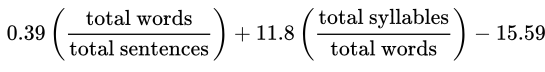

In [267]:
#this code creates a dictionary of words and number of syllables, a start on counting total syllables in a text
entries = nltk.corpus.cmudict.entries()
syllable_dict = dict()
for word, pron in entries: 
    syllable_dict[word] = len([phon for phon in pron if phon[-1].isdigit()])
print (syllable_dict['invisible'])
print (syllable_dict['cat'])

4
1


In [229]:
#to deal with words that weren't in the CMU pronouncing dictionary, I created a syllable dictionary based on the 
#average syllable number based on word length 
#I found this code more clear to write outside of a list comprehension
diy_syllable_dict = dict()
for word, syl in syllable_dict.items(): 
    if len(word) in diy_syllable_dict.keys(): 
        diy_syllable_dict[len(word)].append(syl)
    else: 
        diy_syllable_dict[len(word)] = [syl]

for wordnum, listnum in diy_syllable_dict.items(): 
     diy_syllable_dict[wordnum] = sum(listnum)/len(listnum)

Using the CMU pronouncing dictionary to count syllables is slightly more complicated than it first appears. While the pronouncing dictionary gives us phonemes, these are not the same as syllables (for example the word 'cat' is split into three phonemes while clearly only having one syllable). Counting the number of vowel sounds can give us the number of syllables (one per syllable). Since the pronouncing dictionary gives stress markers for vowels (a number following the phoneme), counting the number of vowels becomes a manageable task. 

In [245]:
#counting syllables in a text using a function 
def tot_syllables(text):
    count = sum([syllable_dict[word] for word in text if word in syllable_dict])
    count += sum([diy_syllable_dict[len(word)] for word in text if word not in syllable_dict]) 
    return count

In [266]:
#to test my syllable dictionary and my DIY syllable dictionary: 
#emily is not in the syllable dict already:
print ('emily' in entries)
sent = 'Readability is the ease with which a reader can understand a written text.'
print ('Normal sentence syllable count: ', tot_syllables(tokenize_text(sent)))
other_sent = 'Readability is the ease with which a reader can understand a written text. Emily'
print ('Sentence with name added syllable count: ', tot_syllables(tokenize_text(other_sent)))

False
Normal sentence syllable count:  21
Sentence with name added syllable count:  24


To understand tokenizing, let's look at how it works on simple sentences. 

In [83]:
sent = 'Readability is the ease with which a reader can understand a written text. It is relevant in many areas such as journalism and media, medical labelling and government documents, bank contracts.'
#we pass word_tokenize the sentence converted into lower case. It breaks the string up into a list of words, much easier to work with
tokens = str(word_tokenize(sent.lower()))
print ('Word tokenize: ', tokens, '\n')
#the regexp tokenizer removes punctuation from our text
tokenizer = RegexpTokenizer(r'\w+')
clean = tokenizer.tokenize(tokens)
print ('Regexptokenizer: ', clean, '\n')
#sent tokenize splits the text into sentences
sent = sent_tokenize(sent)
print ('Sent tokenize: ', sent )


Word tokenize:  ['readability', 'is', 'the', 'ease', 'with', 'which', 'a', 'reader', 'can', 'understand', 'a', 'written', 'text', '.', 'it', 'is', 'relevant', 'in', 'many', 'areas', 'such', 'as', 'journalism', 'and', 'media', ',', 'medical', 'labelling', 'and', 'government', 'documents', ',', 'bank', 'contracts', '.'] 

Regexptokenizer:  ['readability', 'is', 'the', 'ease', 'with', 'which', 'a', 'reader', 'can', 'understand', 'a', 'written', 'text', 'it', 'is', 'relevant', 'in', 'many', 'areas', 'such', 'as', 'journalism', 'and', 'media', 'medical', 'labelling', 'and', 'government', 'documents', 'bank', 'contracts'] 

Sent tokenize:  ['Readability is the ease with which a reader can understand a written text.', 'It is relevant in many areas such as journalism and media, medical labelling and government documents, bank contracts.']


In [247]:
#since I have to tokenize my text often, I created a function
def tokenize_text(text): 
    tokens = str(word_tokenize(text.lower()))
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(tokens)

In [248]:
def Flesch_Kincaid_grade(text):
    clean_text = tokenize_text(text)
    #length of the clean text means that punctuation won't be counted
    total_words = len(clean_text)
    total_sentences = len(sent_tokenize(text))
    total_syllables = tot_syllables(clean_text)
    formula = 0.39*(total_words/total_sentences) + 11.8*(total_syllables/total_words) - 15.69
    return round(formula,2)

In [249]:
#use a dict comprehension to easily examine readability scores 
{key:Flesch_Kincaid_grade(val) for key,val in grade_text.items()}

{'grade 2': 3.67,
 'grade 4': 2.06,
 'grade 6': 3.34,
 'grade 8': 6.11,
 'grade 10': 7.52,
 'grade 12': 7.94,
 'grade 14': 12.11}

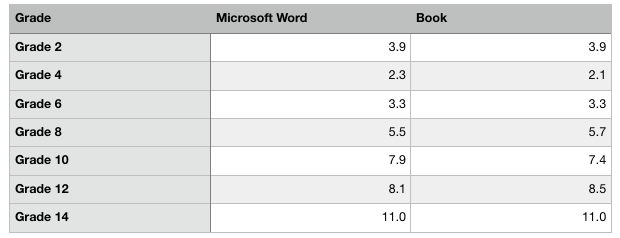

These scores should match the grade levels- i.e. grade 2 should give a score between 2 and 3, and so on. 
We can see from the table that the Flesch-Kincaid tests from Chall, Bissex, Conard, and Harris-Sharples in their book and the Microsoft Word Flesch-Kincaid score yield similar results, but they are still inaccurate when compared to true student testing. 
Will the Dale-Chall readability score do any better?

# Dale-Chall

The Dale-Chall test returns a readability score rather than a grade but the score easily converts to a grade level. It works by counting how many difficult words there are in a text. These difficult words are those not on The Dale-Chall word list of 3000 easy words. The words are categorised as easy if 80% of 5th graders can understand them. Sentence length is also featured, like in the Flesch-Kincaid. 

(Chall, Jeanne Sternlicht; Dale, Edgar (May 1, 1995). Readability revisited)

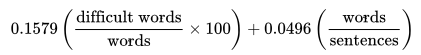

There's one more element to the Dale-Chall that must be remembered. If the percentage of difficult words is above 5, then we add 3.6365 to get an adjusted score.

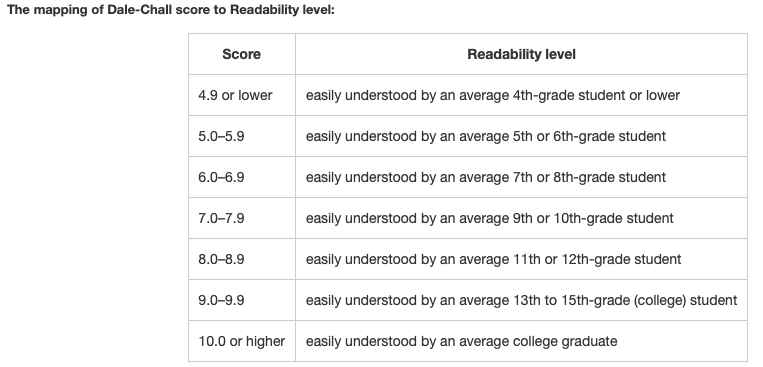

In [72]:
#this takes the list of dale chall 3000 easy words 
#the use of headers makes sure that the website won't see it as abnormal visit

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'}
url = 'http://www.readabilityformulas.com/articles/dale-chall-readability-word-list.php'
req = Request(url=url, headers=headers) 
html = urlopen(req).read() 
#beautiful soup extracts the text from html
raw = BeautifulSoup(html).get_text()
document = tokenize_text(raw)
start = document.index('able')
end = document.index('zabout')
easy_words = document[start:end]

In [198]:
def Dale_Chall(text):
    words = tokenize_text(text)
    #I used a list comprehension to count all the words not on the dale-chall list
    count_diff_words = len(([word for word in words if word not in easy_words]))
    per_diff_words = (count_diff_words/len(text.split())) * 100
    num_sent = len(sent_tokenize(str(text)))
    length = len(text.split())
    av_sent_len = length/num_sent
    raw_score = 0.1579*(per_diff_words) + 0.0496*(av_sent_len)
    if per_diff_words >= 5: 
        adjusted_score = raw_score + 3.6365
    else: 
        adjusted_score = raw_score
    return round(adjusted_score, 2)

In [208]:
{key:Dale_Chall(val) for key,val in grade_text.items()}

{'grade 2': 7.18,
 'grade 4': 6.55,
 'grade 6': 6.65,
 'grade 8': 8.9,
 'grade 10': 8.46,
 'grade 12': 9.7,
 'grade 14': 8.82}

The Dale-Chall doesn't seem to be any better in reliably calculating grade levels. Hopefully the Gunning Fog will have better luck.

# Gunning- Fog

The Gunning formula is very simple, it counts any words with more than two syllables as complex. This has it faults because "interesting" has four syllables and yet would not be categorised as a difficult word. Plural endings are not counted. It also doesn't work for low grade levels, so I'm going to remove grade 2 from my dictionary. Here is the formula: 


( Gunning, Robert (1952). The Technique of Clear Writing. McGraw-Hill.)

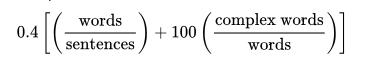

In [250]:
#for this formula, any words greater than two syllables
#are 'complex words'
def complex_words(text): 
    #wnl.lemmatize removes affixes but only if the resulting word is in its dictionary
    stems = [wnl.lemmatize(word) for word in text] 
    count = len([word for word in stems if word in syllable_dict if syllable_dict[word] > 2])
    return count

In [251]:
def Gunning_Fog(text):
    words = tokenize_text(text)  
    total_words = len(text.split())
    total_sentences = len(sent_tokenize(str(text)))
    formula = 0.4*((total_words/total_sentences
                   ) + 100*((complex_words(words))/(length)))
    return round(formula, 2)

In [252]:
grade_text.pop('grade 2')
{key:Gunning_Fog(val) for key,val in grade_text.items()}

{'grade 2': 5.01,
 'grade 4': 3.99,
 'grade 6': 5.52,
 'grade 8': 8.79,
 'grade 10': 11.15,
 'grade 12': 10.65,
 'grade 14': 14.94}

The Gunning FOG formula is the most accurate of the three I have tested. 

# Conclusion

Even though all three of these formulas are very popular and widely used for healthcare, media and legal documents, it seems that both the Flesch-Kincaid and the Dale-Chall struggle with grade school texts. Instead the most simple formula, the Gunning-FOG, succeeds. In my opinion this is because words in grade school reading texts get longer and contain more syllables as the grades increase, whereas in real texts such as a newspaper article long words are not the same as complex words.